## Abstract
Sentiment Analysis, also referred to as opinion mining is a type of analysis that determines the stance or emotion of a person concerning a particular issue. It is a very essential analysis that is widely used by eCommerce companies to understand customers’ perceptions of a product or service based on the reviews they write. In this study, two sentiment analysis models that determine whether a review is negative or positive will be built using the Naive Bayes and regularized linear model with stochastic gradient descent (SGD) learning algorithms and the models will be trained on a set of Amazon reviews. The predictive models will be tested with another set of reviews and the model that fits the reviews best will be recommended after evaluation.


## Introduction
Analyzing product reviews is very essential for eCommerce businesses. Most users read reviews before buying products. Reviews are very significant aspects in online shopping that they can make buyers change their decisions. According to a study “U.S. most popular reasons for buying via Amazon 2020”, it was found that 40% of people who purchase products on amazon buy the products because of the reviews and recommendations (Sabanoglu, 2020). As much as positive reviews help attract more buyers, negative reviews can also affect sales of a product or diminish the credibility of a seller. Thus, eCommerce businesses need to keep an eye on reviews. Most retail companies sell their products on many platforms or some could have an extensive number of sales and reviews that make manual review analysis costly and impractical. By analyzing the sentiment of product reviews, sellers on Amazon can understand the market better and can analyze what their customers like and dislike about their products.  NLP techniques provide an overall perspective for all reviews by performing tasks such as sentiment analysis, review summarization, identifying review helpfulness, and so on. (Vajjala & Majumder, 2020, p 443)
The objective of this study is to build a model that analyzes the sentiment of product reviews efficiently using a dataset scraped from Amazon. The dataset consists of four million labeled, positive and negative Amazon customer reviews. The dataset did not include any neutral reviews because it would be ambiguous to detect sentiment. Two classification models, Naïve Bayes and Support Vector Machine (SVM) with SGD learning will be used and the results will be analyzed.


## Background  
Naive Bayes is a probabilistic classifier that uses Bayes’ theorem to classify texts based on the evidence seen in training data. It estimates the conditional probability of each feature of a given text for each class based on the occurrence of that feature in that class and multiplies the probabilities of all the features of a given text to compute the final probability of classification for each class. Finally, it chooses the class with maximum probability. (Vajjala & Majumder, 2020, p 193). 
The support vector machines (SVMs) on the other hand is a classification method for both linear and nonlinear data. In a nutshell, an SVM is an algorithm that uses a nonlinear mapping to transform the original training data into a higher dimension. Within this new dimension, it searches for the linear optimal separating hyperplane (i.e., a “decision boundary” separating the tuples of one class from another). (Han, 2012, p 408)

## Methodology
In this section, the methods used in this study will be introduced and described.

**Step 1: Data selection**
The dataset used in this study was found from Kaggle, an online community of data scientists and machine learning practitioners and was available to the public. The dataset consists of four million Amazon customer reviews and star ratings labeled (__label1__) for 1 and 2 stars and (__lablel2__) for 4 and 5star reviews. 3 stars reviews were disregarded because they are considered neutral. The dataset already had the data split into train and test sets.

**Step 2: Data preprocessing**
In this step, the data set selected is preprocessed as follows:
1.	Splitting the label (sentiment) and text (reviews) from the string and storing them in a data frame.
2.	Word tokenization: the nltk word_tokenize package is used to remove punctuation from review text.
3.	Removing stopwords: stopwords in the nltk stopwords corpus for the English language are used.
4.	Data Reduction: setting tuple to be used to optimize CPU runtime 
5.	Normalizing Sentiment: setting new labels

**Step 3: Text Representation**
TF-IDF, or term frequency-inverse document frequency text classification method will be used to vectorize the tokens . This quantifies the importance of a given word relative to other words in the reviews. The Scikit learn module will be used to vectorize the data.

"TF-IDF score = TF * IDF" 

Where, 

"TF" ("t,f" )="number of occurrences of term t in document d" /"total number of terms in a document" 

"IDF" ("t" )="Total number of documents in the corpus" /"Number of documents with term t in them" 

**Step 4: Creating Models**

1.	Naïve Bayesian classification model
Let D be a training set of tuples and their associated class labels. As usual, each tuple is represented by an n-dimensional attribute vector, X=(x1, x2, … , xn), and C be the number if classes.
 
2.	Scikit-learn SGD classification model:
This estimator implements regularized linear models(SVM) with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). (Scikit.learn developers, 2011)

**Step 5: Training the classifiers with the training set<br>
Step 6: Testing the Models with the test set<br>
Step 7: Evaluating the models:**

1.	Computing the confusion matrix
2.	Computing the evaluation matrix


In [1]:
import bz2
import os
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

import sklearn
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


## Reading data from file

In [2]:
print(os.listdir('C:\\IT-576\\reviews'))

['test.ft.txt.bz2', 'train.ft.txt.bz2']


In [3]:
trainfile = bz2.BZ2File('C:\\IT-576\\reviews\\train.ft.txt.bz2','r')
trainlines = trainfile.readlines()

testfile = bz2.BZ2File('C:\\IT-576\\reviews\\test.ft.txt.bz2','r')
testlines = testfile.readlines()

In [4]:
len(trainlines),len(testlines)

(3600000, 400000)

In [5]:
#sample review
testlines[1]



b"__label__2 One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.\n"

The reviewes are labeled as:
- **___label __2** if positive and
- **___label __1** if negative
   

In [6]:
#label sepatater

In [7]:
test_review_sentiment_list=[]
train_review_sentiment_list=[]
def text_lable_separator(data,review_list,split_string='__label__'):
    for i in range(len(data)):
        review=str(data[i])
        splitText=review.split(split_string)
        secHalf=splitText[1]
        text=secHalf[2:len(secHalf)-1]
        sentiment=secHalf[0]
        review_list.append([text,sentiment])
    return review_list

## Setting train and test sets

In [8]:
text_lable_separator(trainlines[:400000],train_review_sentiment_list)
text_lable_separator(testlines[:100000],test_review_sentiment_list)
len(train_review_sentiment_list),len(test_review_sentiment_list)

(400000, 100000)

In [9]:
train_df = pd.DataFrame(train_review_sentiment_list,columns=['Text','Sentiment'])
test_df = pd.DataFrame(test_review_sentiment_list,columns=['Text','Sentiment'])

In [10]:
train_df['Sentiment'][train_df['Sentiment']=='1'] = 'neg'
train_df['Sentiment'][train_df['Sentiment']=='2'] = 'pos'

test_df['Sentiment'][test_df['Sentiment']=='1'] = 'neg'
test_df['Sentiment'][test_df['Sentiment']=='2'] = 'pos'

#### Text Pre-proccessing 

In [11]:
s_words=nltk.corpus.stopwords.words('english')
def preprocess_text(dff, feature):   
        preprocessed_text = []   
        for sent in dff[feature].values:       
            token= nltk.word_tokenize(sent.lower())      #tokenize
            sent= ' '.join(e for e in token if e not in s_words)
            
            preprocessed_text.append(sent.lower().strip()) 
        return preprocessed_text 

In [12]:
train_prep_reviews=preprocess_text(train_df, 'Text')
test_prep_reviews=preprocess_text(test_df, 'Text')

#### Converting raw frequency counts into TF-IDF values

In [13]:
vectorizer = TfidfVectorizer(min_df=10, max_df=0.95)
train_tfidf = vectorizer.fit_transform(train_prep_reviews)
test_tfidf = vectorizer.transform(test_prep_reviews)

In [14]:
print("Shape of train matrix after Tfidf : ",train_tfidf.shape)
print("Shape of test matrix after Tfidf : ",test_tfidf.shape)

Shape of train matrix after Tfidf :  (400000, 39767)
Shape of test matrix after Tfidf :  (100000, 39767)


In [15]:
X_tr = train_tfidf
y_tr = train_df['Sentiment']
X_ts = test_tfidf
y_ts = test_df['Sentiment']
print(X_tr.shape)
print(y_tr.shape)
print(X_ts.shape)
print(y_ts.shape)

## Training Models

#### Naive Bayes Classifier


In [17]:
NB_model = MultinomialNB()
NB_model.fit(X_tr, y_tr)


MultinomialNB()

##### Testing Model

[[41942  7479]
 [ 7973 42606]]
              precision    recall  f1-score   support

         neg       0.84      0.85      0.84     49421
         pos       0.85      0.84      0.85     50579

    accuracy                           0.85    100000
   macro avg       0.85      0.85      0.85    100000
weighted avg       0.85      0.85      0.85    100000

Confusion matrix, without normalization
[[41942  7479]
 [ 7973 42606]]
Normalized confusion matrix
[[0.84866757 0.15133243]
 [0.15763459 0.84236541]]


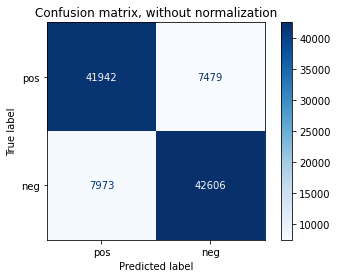

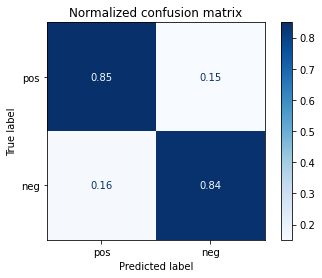

In [18]:
y_pred = NB_model.predict(X_ts)
confusionmatrix = confusion_matrix(y_ts, y_pred)
print(confusionmatrix)
print(classification_report(y_ts,  y_pred))
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = train_df['Sentiment'].unique()
for title, normalize in titles_options:
    disp = plot_confusion_matrix(NB_model, X_ts, y_ts,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Linear Support Vector Machine (SVM) classifier with SGD training

##### Training Model

In [19]:
SGD_model = SGDClassifier().fit(X_tr, y_tr)

##### Testing Model

[[43448  5973]
 [ 5664 44915]]
              precision    recall  f1-score   support

         neg       0.88      0.88      0.88     49421
         pos       0.88      0.89      0.89     50579

    accuracy                           0.88    100000
   macro avg       0.88      0.88      0.88    100000
weighted avg       0.88      0.88      0.88    100000

Confusion matrix, without normalization
[[43448  5973]
 [ 5664 44915]]
Normalized confusion matrix
[[0.87914045 0.12085955]
 [0.11198323 0.88801677]]


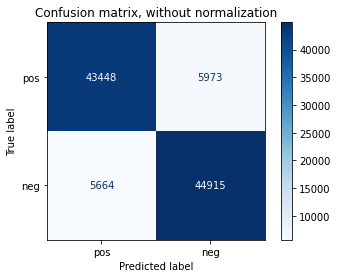

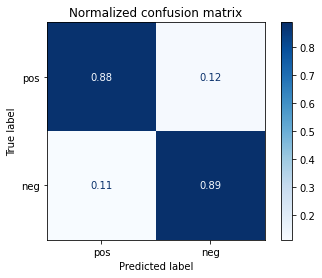

In [21]:
SGD_pred = SGD_model.predict(X_ts)
confusionmatrix = confusion_matrix(y_ts, SGD_pred)
print(confusionmatrix)
print(classification_report(y_ts,  SGD_pred))
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = train_df['Sentiment'].unique()
for title, normalize in titles_options:
    disp = plot_confusion_matrix(SGD_model, X_ts, y_ts,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Checking models on random Amazon reviews

In [22]:
random_reviews = ["I've read a few books by this author and loved them all so was keen to get another. \nI really disliked the way that the narrative jumps about in a way that makes me think the author was trying too hard to be rebelious.\nThe author is very bitter and twisted which does not reflect well into his writing.",
               'Touching, funny memoir. The writing is original and informal.The personal tale Eggars tells is indeed heartbreaking and yet recounted without a hint of self pity. Eggars’ anecdotes are vivid and often comedic. This is a brilliant read and his novels are also worth exploring. The only book I know of where the title and review are rolled into one!' ]
reviews_new_tfidf = vectorizer.transform(random_reviews)  # turn into tfidf vector
categories=train_df['Sentiment'].unique()
NBprediction = NB_model.predict(reviews_new_tfidf)
SGDprediction = SGD_model.predict(reviews_new_tfidf)
for review, NBsentiment,SGDsentiment  in zip(random_reviews, NBprediction,SGDprediction):
    print(f"{review}\n\n Sentiment NB: {NBsentiment}\n Sentiment SGD: {SGDsentiment}\n ")
    

I've read a few books by this author and loved them all so was keen to get another. 
I really disliked the way that the narrative jumps about in a way that makes me think the author was trying too hard to be rebelious.
The author is very bitter and twisted which does not reflect well into his writing.

 Sentiment NB: neg
 Sentiment SGD: neg
 
Touching, funny memoir. The writing is original and informal.The personal tale Eggars tells is indeed heartbreaking and yet recounted without a hint of self pity. Eggars’ anecdotes are vivid and often comedic. This is a brilliant read and his novels are also worth exploring. The only book I know of where the title and review are rolled into one!

 Sentiment NB: pos
 Sentiment SGD: pos
 


## Conclusion
Both models performed well. The SGD classifier gave 3% higher accuracy than the Naïve Bayes classifier. The model was tested with a different number of tuples (train set sizes) but it didn’t give a significant difference. According to the outcomes of this study, the SGD classifier works better for analyzing the sentiment of amazon reviews and the model can be applied in analyzing similar eCommerce reviews.

### Further Analysis
*Finding the missing features in the misclassified sentences and identifying what features also led to success in both pos and neg categories*
